In [ ]:
!pip install requests
!pip install yfinance

     |████████████████████████████████| 5.5MB 14.6MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=a256096f7b7719759354f8d42f9d13ded938e1ce9798650faa082b00d0e458a2
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import pandas as pd
import yfinance as yf
import datetime
import time
import requests
import io
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
start = datetime.datetime(2021,4,1)
end = datetime.datetime(2021,4,30)

In [ ]:
url="https://pkgstore.datahub.io/core/nasdaq-listings/nasdaq-listed_csv/data/7665719fb51081ba0bd834fde71ce822/nasdaq-listed_csv.csv"
s = requests.get(url).content
companies = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [ ]:
companies

,Symbol,Company Name,Security Name,Market Category,Test Issue,Financial Status,Round Lot Size
0,AAIT,iShares MSCI All Country Asia Information Tech...,iShares MSCI All Country Asia Information Tech...,G,N,N,100.0
1,AAL,"American Airlines Group, Inc.","American Airlines Group, Inc. - Common Stock",Q,N,N,100.0
2,AAME,Atlantic American Corporation,Atlantic American Corporation - Common Stock,G,N,N,100.0
3,AAOI,"Applied Optoelectronics, Inc.","Applied Optoelectronics, Inc. - Common Stock",G,N,N,100.0
4,AAON,"AAON, Inc.","AAON, Inc. - Common Stock",Q,N,N,100.0
...,...,...,...,...,...,...,...
2962,ZN,Zion Oil & Gas Inc,Zion Oil & Gas Inc - Common Stock,G,N,N,100.0
2963,ZNGA,Zynga Inc.,Zynga Inc. - Class A Common Stock,Q,N,N,100.0
2964,ZSPH,"ZS Pharma, Inc.","ZS Pharma, Inc. - Common Stock",G,N,N,100.0
2965,ZU,"zulily, inc.","zulily, inc. - Class A Common Stock",Q,N,N,100.0


In [ ]:
Symbols = companies['Symbol'].tolist()

In [ ]:
Symbols

['AAIT',
 'AAL',
 'AAME',
 'AAOI',
 'AAON',
 'AAPL',
 'AAVL',
 'AAWW',
 'AAXJ',
 'ABAC',
 'ABAX',
 'ABCB',
 'ABCD',
 'ABCO',
 'ABCW',
 'ABDC',
 'ABGB',
 'ABIO',
 'ABMD',
 'ABTL',
 'ABY',
 'ACAD',
 'ACAS',
 'ACAT',
 'ACET',
 'ACFC',
 'ACFN',
 'ACGL',
 'ACHC',
 'ACHN',
 'ACIW',
 'ACLS',
 'ACNB',
 'ACOR',
 'ACPW',
 'ACRX',
 'ACSF',
 'ACST',
 'ACTA',
 'ACTG',
 'ACTS',
 'ACUR',
 'ACWI',
 'ACWX',
 'ACXM',
 'ADAT',
 'ADBE',
 'ADEP',
 'ADES',
 'ADHD',
 'ADI',
 'ADMA',
 'ADMP',
 'ADMS',
 'ADNC',
 'ADP',
 'ADRA',
 'ADRD',
 'ADRE',
 'ADRU',
 'ADSK',
 'ADTN',
 'ADUS',
 'ADVS',
 'ADXS',
 'ADXSW',
 'AEGN',
 'AEGR',
 'AEHR',
 'AEIS',
 'AEPI',
 'AERI',
 'AETI',
 'AEY',
 'AEZS',
 'AFAM',
 'AFCB',
 'AFFX',
 'AFH',
 'AFMD',
 'AFOP',
 'AFSI',
 'AGEN',
 'AGII',
 'AGIIL',
 'AGIO',
 'AGNC',
 'AGNCB',
 'AGNCP',
 'AGND',
 'AGRX',
 'AGTC',
 'AGYS',
 'AGZD',
 'AHGP',
 'AHPI',
 'AIMC',
 'AINV',
 'AIQ',
 'AIRM',
 'AIRR',
 'AIRT',
 'AIXG',
 'AKAM',
 'AKAO',
 'AKBA',
 'AKER',
 'AKRX',
 'ALCO',
 'ALDR',
 'ALDX',
 'AL

In [ ]:
# create empty dataframe
stock_final = pd.DataFrame()
# iterate over each symbol
for i in Symbols:  
    
    # print the symbol which is being downloaded
    print( str(Symbols.index(i)) + str(' : ') + i, sep=',', end=',', flush=True)  
    
    try:
        # download the stock price 
        stock = []
        stock = yf.download(i,start=start, end=end, progress=False)
        
        # append the individual stock prices 
        if len(stock) == 0:
            None
        else:
            stock['Name']=i
            stock_final = stock_final.append(stock,sort=False)
    except Exception:
        None

0 : AAIT,1 : AAL,2 : AAME,3 : AAOI,4 : AAON,5 : AAPL,6 : AAVL,
1 Failed download:
- AAVL: No data found for this date range, symbol may be delisted
7 : AAWW,8 : AAXJ,9 : ABAC,
1 Failed download:
- ABAC: No data found for this date range, symbol may be delisted
10 : ABAX,
1 Failed download:
- ABAX: No data found for this date range, symbol may be delisted
11 : ABCB,12 : ABCD,
1 Failed download:
- ABCD: No data found for this date range, symbol may be delisted
13 : ABCO,14 : ABCW,
1 Failed download:
- ABCW: No data found for this date range, symbol may be delisted
15 : ABDC,
1 Failed download:
- ABDC: No data found, symbol may be delisted
16 : ABGB,
1 Failed download:
- ABGB: No data found for this date range, symbol may be delisted
17 : ABIO,18 : ABMD,19 : ABTL,
1 Failed download:
- ABTL: No data found for this date range, symbol may be delisted
20 : ABY,
1 Failed download:
- ABY: No data found for this date range, symbol may be delisted
21 : ACAD,22 : ACAS,
1 Failed download:
- ACAS: N

In [ ]:
stock_final.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2021-04-01,0.086,0.086,0.086,0.086,0.086,423000.0,AAIT
2021-04-05,0.088,0.090,0.088,0.089,0.089,6120013.0,AAIT
2021-04-06,0.090,0.093,0.090,0.091,0.091,3649992.0,AAIT
2021-04-07,0.091,0.092,0.090,0.091,0.091,1256070.0,AAIT
2021-04-08,0.090,0.090,0.089,0.089,0.089,434678.0,AAIT


In [ ]:
df2 = stock_final.copy()

In [ ]:
df2.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2021-04-01,0.086,0.086,0.086,0.086,0.086,423000.0,AAIT
2021-04-05,0.088,0.090,0.088,0.089,0.089,6120013.0,AAIT
2021-04-06,0.090,0.093,0.090,0.091,0.091,3649992.0,AAIT
2021-04-07,0.091,0.092,0.090,0.091,0.091,1256070.0,AAIT
2021-04-08,0.090,0.090,0.089,0.089,0.089,434678.0,AAIT


In [ ]:
df2.drop(['Open','High'],axis=1)

,Low,Close,Adj Close,Volume,Name
Date,,,,,
2021-04-01,0.086000,0.086000,0.086000,423000.0,AAIT
2021-04-05,0.088000,0.089000,0.089000,6120013.0,AAIT
2021-04-06,0.090000,0.091000,0.091000,3649992.0,AAIT
2021-04-07,0.090000,0.091000,0.091000,1256070.0,AAIT
2021-04-08,0.089000,0.089000,0.089000,434678.0,AAIT
...,...,...,...,...,...
2021-04-23,42.840000,44.910000,44.910000,223000.0,ZUMZ
2021-04-26,42.599998,42.980000,42.980000,163800.0,ZUMZ
2021-04-27,42.799999,43.930000,43.930000,101100.0,ZUMZ


In [ ]:
df2.drop(['Low','Volume','Adj Close'],axis=1)

,Open,High,Close,Name
Date,,,,
2021-04-01,0.086000,0.086000,0.086000,AAIT
2021-04-05,0.088000,0.090000,0.089000,AAIT
2021-04-06,0.090000,0.093000,0.091000,AAIT
2021-04-07,0.091000,0.092000,0.091000,AAIT
2021-04-08,0.090000,0.090000,0.089000,AAIT
...,...,...,...,...
2021-04-23,43.590000,45.250000,44.910000,ZUMZ
2021-04-26,45.369999,45.540001,42.980000,ZUMZ
2021-04-27,43.200001,44.700001,43.930000,ZUMZ


In [ ]:
df2=df2.drop(['Low','Volume','Adj Close','High','Open'],axis=1)

In [ ]:
df2.head()

,Close,Name
Date,,
2021-04-01,0.086,AAIT
2021-04-05,0.089,AAIT
2021-04-06,0.091,AAIT
2021-04-07,0.091,AAIT
2021-04-08,0.089,AAIT


In [ ]:
df3 = df2.pivot_table(values='Close',index=['Name'],columns='Date')

In [ ]:
df3.head()

Date,2021-04-01,2021-04-05,2021-04-06,2021-04-07,2021-04-08,2021-04-09,2021-04-12,2021-04-13,2021-04-14,2021-04-15,2021-04-16,2021-04-19,2021-04-20,2021-04-21,2021-04-22,2021-04-23,2021-04-26,2021-04-27,2021-04-28,2021-04-29
Name,,,,,,,,,,,,,,,,,,,,
AAIT,0.086000,0.089000,0.091000,0.091000,0.089000,0.000000,0.095,0.098000,0.097000,0.088000,0.000000,0.086000,0.089000,0.088000,0.087,0.000000,0.000000,0.000000,0.000000,0.000000
AAL,23.860001,24.230000,24.059999,23.930000,23.650000,23.540001,22.910,22.559999,22.370001,22.129999,22.030001,21.549999,20.370001,21.010000,20.070,21.110001,22.040001,21.760000,21.700001,21.299999
AAME,4.000000,4.020000,4.030000,3.750000,3.980000,3.850000,3.640,3.480000,3.700000,3.550000,3.700000,3.750000,3.780000,3.870000,4.160,4.000000,4.190000,4.020000,4.290000,4.180000
AAOI,8.820000,8.690000,8.470000,8.480000,8.410000,8.440000,8.270,8.220000,8.290000,7.880000,7.890000,7.720000,7.580000,7.920000,8.010,8.270000,8.280000,8.130000,8.200000,7.910000
AAON,70.870003,70.839996,70.550003,68.919998,68.699997,70.160004,69.680,68.830002,68.839996,69.680000,69.510002,69.279999,68.410004,69.290001,69.680,69.800003,68.540001,68.529999,68.110001,67.559998


In [ ]:
df3=df3.replace(np.nan,0)

In [ ]:
df3.head()

Date,2021-04-01,2021-04-05,2021-04-06,2021-04-07,2021-04-08,2021-04-09,2021-04-12,2021-04-13,2021-04-14,2021-04-15,2021-04-16,2021-04-19,2021-04-20,2021-04-21,2021-04-22,2021-04-23,2021-04-26,2021-04-27,2021-04-28,2021-04-29
Name,,,,,,,,,,,,,,,,,,,,
AAIT,0.086000,0.089000,0.091000,0.091000,0.089000,0.000000,0.095,0.098000,0.097000,0.088000,0.000000,0.086000,0.089000,0.088000,0.087,0.000000,0.000000,0.000000,0.000000,0.000000
AAL,23.860001,24.230000,24.059999,23.930000,23.650000,23.540001,22.910,22.559999,22.370001,22.129999,22.030001,21.549999,20.370001,21.010000,20.070,21.110001,22.040001,21.760000,21.700001,21.299999
AAME,4.000000,4.020000,4.030000,3.750000,3.980000,3.850000,3.640,3.480000,3.700000,3.550000,3.700000,3.750000,3.780000,3.870000,4.160,4.000000,4.190000,4.020000,4.290000,4.180000
AAOI,8.820000,8.690000,8.470000,8.480000,8.410000,8.440000,8.270,8.220000,8.290000,7.880000,7.890000,7.720000,7.580000,7.920000,8.010,8.270000,8.280000,8.130000,8.200000,7.910000
AAON,70.870003,70.839996,70.550003,68.919998,68.699997,70.160004,69.680,68.830002,68.839996,69.680000,69.510002,69.279999,68.410004,69.290001,69.680,69.800003,68.540001,68.529999,68.110001,67.559998


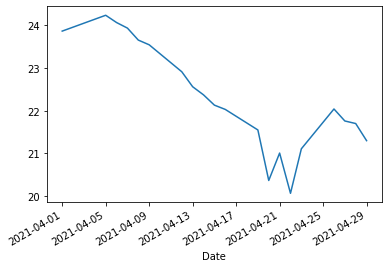

In [ ]:
row = df3.iloc[1]
row.plot(kind='line')
plt.show()

In [ ]:
df3.shape

(1765, 20)

In [ ]:
industry=pd.read_csv('industrialgeneralisation.csv')

In [ ]:
industry

,Symbol,Industry
0,A,Electrical Products
1,AA,Metal Fabrications
2,AAC,Business Services
3,AACG,Service to the Health Industry
4,AACQ,Business Services
...,...,...
7650,ZWRKW,Business Services
7651,ZY,Industrial Specialties
7652,ZYME,NaN
7653,ZYNE,Major Pharmaceuticals


In [ ]:
def compari(df1,df2):
  for i in range(0,df1.shape[0]):
    for j in range(0,df2.shape[0]):
      if df1['Name'][i]==df2['Symbol'][j]:
        df1['Industry'][i]=df2['Industry'][j] 
      else:
        df1["Industry"][i]=""


In [ ]:
compari(df2,industry)

KeyError: ignored

In [ ]:
df3.to_csv('refinedata.csv')

In [ ]:
df4=pd.read_csv('refinedata.csv')

In [ ]:
df4.head()

,Name,2021-04-01,2021-04-05,2021-04-06,2021-04-07,2021-04-08,2021-04-09,2021-04-12,2021-04-13,2021-04-14,2021-04-15,2021-04-16,2021-04-19,2021-04-20,2021-04-21,2021-04-22,2021-04-23,2021-04-26,2021-04-27,2021-04-28,2021-04-29
0,AAIT,0.086000,0.089000,0.091000,0.091000,0.089000,0.000000,0.095,0.098000,0.097000,0.088000,0.000000,0.086000,0.089000,0.088000,0.087,0.000000,0.000000,0.000000,0.000000,0.000000
1,AAL,23.860001,24.230000,24.059999,23.930000,23.650000,23.540001,22.910,22.559999,22.370001,22.129999,22.030001,21.549999,20.370001,21.010000,20.070,21.110001,22.040001,21.760000,21.700001,21.299999
2,AAME,4.000000,4.020000,4.030000,3.750000,3.980000,3.850000,3.640,3.480000,3.700000,3.550000,3.700000,3.750000,3.780000,3.870000,4.160,4.000000,4.190000,4.020000,4.290000,4.180000
3,AAOI,8.820000,8.690000,8.470000,8.480000,8.410000,8.440000,8.270,8.220000,8.290000,7.880000,7.890000,7.720000,7.580000,7.920000,8.010,8.270000,8.280000,8.130000,8.200000,7.910000
4,AAON,70.870003,70.839996,70.550003,68.919998,68.699997,70.160004,69.680,68.830002,68.839996,69.680000,69.510002,69.279999,68.410004,69.290001,69.680,69.800003,68.540001,68.529999,68.110001,67.559998


In [ ]:
df.rename()

In [ ]:
df4['Industry'] = df4.apply(lambda x: (np.where(df4['Name'] == industry['Symbol'])) ,axis=1)

ValueError: ignored